In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import ensemble_model.preprocesser as preprocesser 
import ensemble_model.combined_model as cm 
from torch.utils.data import Dataset, DataLoader
from transformers import BertModel, BertTokenizer, RobertaModel, RobertaTokenizer
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve

In [2]:
# train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
# test_data, val_data = train_test_split(test_data, test_size=0.5, random_state=42)
train = pd.read_csv('./datasets/PD_train.csv')
test = pd.read_csv('./datasets/PD_test.csv')
val = pd.read_csv('./datasets/PD_val.csv')

train.reset_index(inplace=True)
test.reset_index(inplace=True)
val.reset_index(inplace=True)

In [3]:
# df['command'] = df['diff'].apply(lambda x : extract_lines(find_longest_list([y.changes for y in whatthepatch.parse_patch(x)])))
# extracted_cols = df['diff'].str.extract(r'^diff --git (?P<source>[^\t\n]+) (?P<target>[^\t\n]+)')
# whatthepatch.apply_diff(diff, lao)

In [4]:
# len(df_dataset)

In [5]:
# df_dataset[0]

In [6]:
# Load BERT and CodeBERT models and tokenizers
bert_model = BertModel.from_pretrained('./models/bert-base-cased')
bert_tokenizer = BertTokenizer.from_pretrained('./models/bert-base-cased')

codebert_model = RobertaModel.from_pretrained('./models/codebert-base')
codebert_tokenizer = RobertaTokenizer.from_pretrained('./models/codebert-base')

/root/miniconda3/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/root/miniconda3/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [7]:


# Create Datasets and DataLoaders
train_dataset = preprocesser.SentencePairDataset(train, bert_tokenizer, codebert_tokenizer,message='commit_message',command='diff_code',label='category')
val_dataset = preprocesser.SentencePairDataset(val, bert_tokenizer, codebert_tokenizer,message='commit_message',command='diff_code',label='category')
test_dataset = preprocesser.SentencePairDataset(test, bert_tokenizer, codebert_tokenizer,message='commit_message',command='diff_code',label='category')
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



# # Initialize the model
# model = em.CombinedModel(bert_model, codebert_model, bert_tokenizer, codebert_tokenizer)

# # Train the model
# model.trainer(train_loader, val_loader,num_epochs=10)
# for batch in train_loader:
#     print(batch)


base_model1 = cm.BaseModel(bert_model,bert_tokenizer)
base_model2 = cm.BaseModel(codebert_model,codebert_tokenizer)

# Create stacking model
combined_model = cm.CombinedModel(base_model1, base_model2)
# Train the model
combined_model.trainer(train_loader, val_loader,num_epochs=10, patience=3)

/root/miniconda3/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1/10 Loss: 0.2984: 100%|██████████| 784/784 [08:02<00:00,  3.22batch/s]

=============================train========================
=============================eval========================


Epoch 1/10 Loss: 0.2984: 100%|██████████| 784/784 [08:59<00:00,  1.45batch/s]


Validation Accuracy: 0.9276009678019729
Precision: 0.927186819152067
Recall: 0.9276009678019729
F1-Score: 0.927017556250496
Epoch 1/10, Validation Accuracy: 0.9276009678019729
当前best acc 0.9276009678019729


Epoch 2/10 Loss: 0.1794: 100%|██████████| 784/784 [08:06<00:00,  2.04batch/s]

=============================train========================
=============================eval========================


Epoch 2/10 Loss: 0.1794: 100%|██████████| 784/784 [09:03<00:00,  1.44batch/s]


Validation Accuracy: 0.9352317141261864
Precision: 0.9350169009012258
Recall: 0.9352317141261864
F1-Score: 0.9346375264443929
Epoch 2/10, Validation Accuracy: 0.9352317141261864
当前best acc 0.9352317141261864


Epoch 3/10 Loss: 0.1269: 100%|██████████| 784/784 [09:04<00:00,  1.67s/batch]

=============================train========================
=============================eval========================


Epoch 3/10 Loss: 0.1269: 100%|██████████| 784/784 [09:58<00:00,  1.31batch/s]


Validation Accuracy: 0.932998324958124
Precision: 0.932625476087165
Recall: 0.932998324958124
F1-Score: 0.9325987430187326
Epoch 3/10, Validation Accuracy: 0.932998324958124
比best acc差记一次 0


Epoch 4/10 Loss: 0.0785: 100%|██████████| 784/784 [07:39<00:00,  2.47batch/s]

=============================train========================
=============================eval========================


Epoch 4/10 Loss: 0.0785: 100%|██████████| 784/784 [08:37<00:00,  1.51batch/s]


Validation Accuracy: 0.9350455983621813
Precision: 0.93470106962713
Recall: 0.9350455983621813
F1-Score: 0.9346421293640355
Epoch 4/10, Validation Accuracy: 0.9350455983621813
比best acc差记一次 1


Epoch 5/10 Loss: 0.0486: 100%|██████████| 784/784 [07:03<00:00,  2.36batch/s]

=============================train========================
=============================eval========================


Epoch 5/10 Loss: 0.0486: 100%|██████████| 784/784 [08:02<00:00,  1.62batch/s]

Validation Accuracy: 0.9344872510701656
Precision: 0.9341390251996857
Recall: 0.9344872510701656
F1-Score: 0.9340640161824715
Epoch 5/10, Validation Accuracy: 0.9344872510701656
比best acc差记一次 2
Early stopping
best acc是 0.9352317141261864


In [8]:
test_dataset = preprocesser.SentencePairDataset(test, bert_tokenizer, codebert_tokenizer,message='commit_message',command='diff_code',label='category')
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [9]:
test_acc, test_labels, test_probabilities, test_embeddings, test_predictions = combined_model.evaluate(test_loader)

Validation Accuracy: 0.9262844378257632
Precision: 0.9259227799707783
Recall: 0.9262844378257632
F1-Score: 0.9259289072199677


In [10]:
res = test.copy()

In [11]:
res['test_labels'] = test_labels
res['test_probabilities'] = test_probabilities
res['test_embeddings'] = test_embeddings
res['test_predictions'] = test_predictions

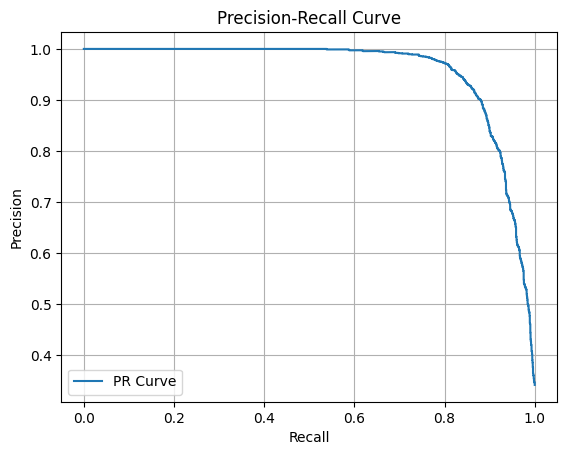

In [12]:
# PR curve
combined_model.plot_pr_curve(test_labels, test_probabilities)
# Plot t-SNE for the best model

embedding来啦 (1536,)


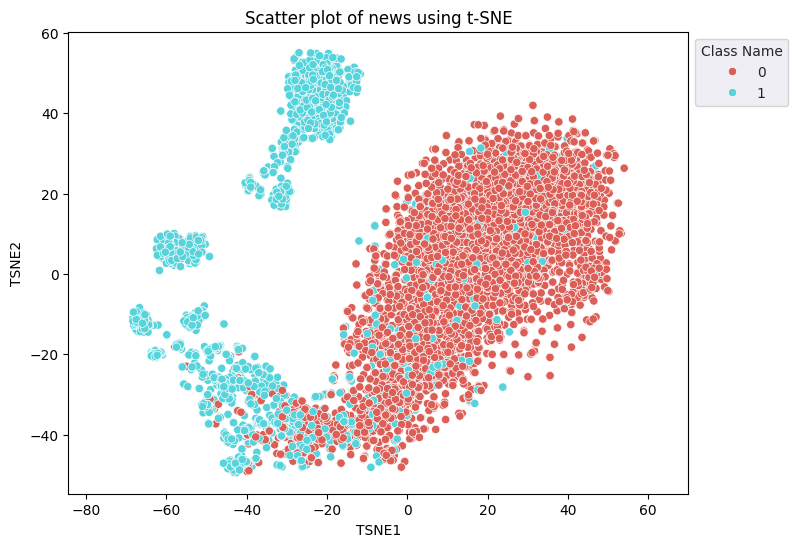

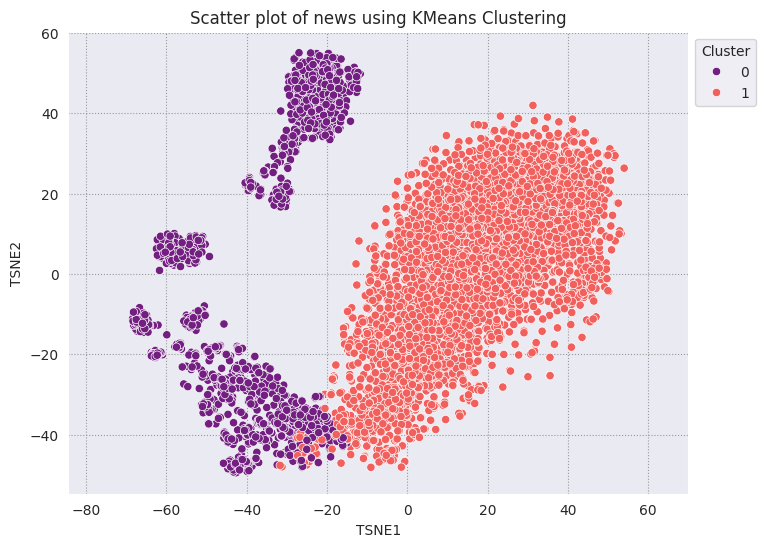

In [13]:
# cluster to show the quality of embeddings
combined_model.plot_tsne(test_embeddings, test_labels)

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix on Dataset I', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    # plt.xlabel('Predicted label')
    plt.tight_layout()

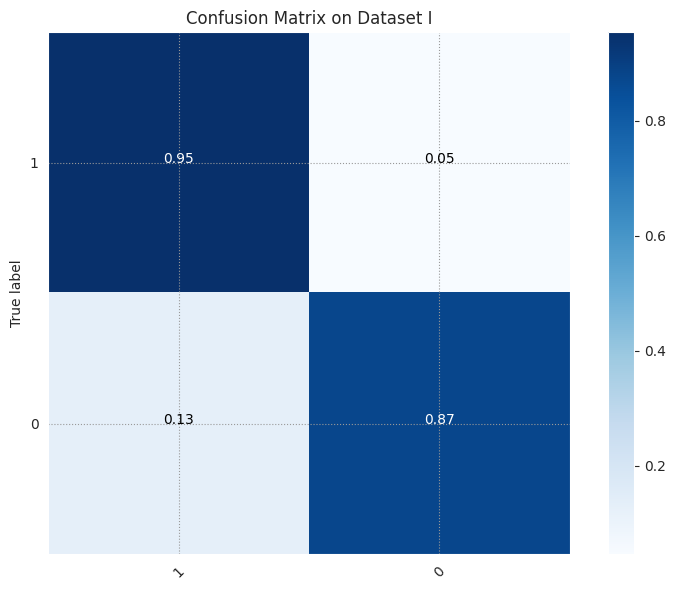

In [16]:
cm = confusion_matrix(test_labels, test_predictions)

# Call the function to plot the confusion matrix
class_names = test['category'].unique()  # Replace with your class names
plot_confusion_matrix(cm, classes=class_names, normalize=True)  # Set normalize=False if you want counts instead of percentages
plt.savefig('Confusion Matrix on combined_model_Patch_DB')

In [17]:
res.to_csv('combined_model_Patch_DB.csv')

In [18]:
res_mis = test.copy()

In [19]:
# test_data

In [20]:
# 设置数据缺失的情况
# 设置随机种子以便结果可重复
import numpy as np
def data_missing(df):
    
    np.random.seed(42)
    
    # 定义缺失值的比例
    missing_rate = 0.2
    
    # 计算每列需要创建缺失值的数量
    num_missing = int(missing_rate * len(df))
    
    # 随机选择行进行缺失
    for col in ['commit_message', 'diff_code']:
        missing_indices = np.random.choice(df.index, num_missing, replace=False)
        
        # 选择每个单元格的部分字符来替换，而不是全部替换成NaN
        for idx in missing_indices:
            if np.random.rand() > 0.5:
                # 保留前半部分
                try:
                    # print(df.loc[idx, col][:len(df.loc[idx, col])//2] + '...')
                    df.loc[idx, col] = df.loc[idx, col][:len(df.loc[idx, col])//2] + '...'
                except:
                    continue
            else:
                # 保留后半部分
                try:
                    # print('...' + df.loc[idx, col][len(df.loc[idx, col])//2:])
                    df.loc[idx, col] = '...' + df.loc[idx, col][len(df.loc[idx, col])//2:]
                except:
                    continue
    
    return df
test_data_miss = data_missing(test)

In [21]:
test_data_miss

,index,Unnamed: 0,CVE_ID,CWE_ID,category,commit_id,commit_message,diff_code,owner,repo,source
0,0,27776,NaN,NaN,1,600a507ddcb99096731e1d96a3ebf43e20fc7f80,commit 600a507ddcb99096731e1d96a3ebf43e20fc7f8...,diff --git a/drivers/net/ethernet/intel/ixgbe/...,mjg59,linux,wild
1,1,25795,NaN,NaN,1,2a98dbbcd72cfae508c4d90bcbdc829363554ea7,commit 2a98dbbcd72cfae508c4d90bcbdc829363554ea...,diff --git a/drivers/usb/gadget/f_ecm.c b/driv...,torvalds,linux,wild
2,2,20663,NaN,NaN,0,33bf6102210bcbd39844514033898910c24824df,commit 33bf6102210bcbd39844514033898910c24824d...,diff --git a/sys/netinet/ip_ah.c b/sys/netinet...,openbsd,src,wild
3,3,16926,NaN,NaN,0,cc215898396ec6dccc900eed193c8ca6a2c77894,commit cc215898396ec6dccc900eed193c8ca6a2c7789...,diff --git a/sql/item_strfunc.cc b/sql/item_st...,mysql,mysql-server,wild
4,4,21645,NaN,NaN,0,3cdc0ed0cea50ea08dd146c1bbc82b1bcc2e1b80,commit 3cdc0ed0cea50ea08dd146c1bbc82b1bcc2e1b8...,diff --git a/mm/slab.c b/mm/slab.c\nindex 2e71...,stoth68000,media-tree,wild
...,...,...,...,...,...,...,...,...,...,...,...
5367,5367,28506,NaN,NaN,1,1708e2eb042f3511a2a02dbf7f6fbb22afe51e2d,...ps://bugs.debian.org/cgi-bin/bugreport.cgi?...,diff --git a/ui/gtk/stats_tree_stat.c b/ui/gtk...,wireshark,wireshark,wild
5368,5368,32843,CVE-2013-4530,119,1,d8d0a0bc7e194300e53a346d25fe5724fd588387,From d8d0a0bc7e194300e53a346d25fe5724fd588387 ...,diff --git a/hw/ssi/pl022.c b/hw/ssi/pl022.c\n...,NaN,NaN,cve
5369,5369,16533,NaN,NaN,0,fb522f16ee93bf7be38ab7255cb11c68d3752ad2,commit fb522f16ee93bf7be38ab7255cb11c68d3752ad...,diff --git a/ext/oci8/oci8_interface.c b/ext/o...,php,php-src,wild
5370,5370,5157,NaN,NaN,0,1b74c25bc1a142ee8dd7ad080e2a974f28d1cb18,commit 1b74c25bc1a142ee8dd7ad080e2a974f28d1cb1...,diff --git a/fs/nfsd/nfs4state.c b/fs/nfsd/nfs...,stoth68000,media-tree,wild


In [22]:
test_data_miss['commit_message']

0       commit 600a507ddcb99096731e1d96a3ebf43e20fc7f8...
1       commit 2a98dbbcd72cfae508c4d90bcbdc829363554ea...
2       commit 33bf6102210bcbd39844514033898910c24824d...
3       commit cc215898396ec6dccc900eed193c8ca6a2c7789...
4       commit 3cdc0ed0cea50ea08dd146c1bbc82b1bcc2e1b8...
                              ...                        
5367    ...ps://bugs.debian.org/cgi-bin/bugreport.cgi?...
5368    From d8d0a0bc7e194300e53a346d25fe5724fd588387 ...
5369    commit fb522f16ee93bf7be38ab7255cb11c68d3752ad...
5370    commit 1b74c25bc1a142ee8dd7ad080e2a974f28d1cb1...
5371    commit d16b4b3e485526b39e7bdc36bf2d8041080a720...
Name: commit_message, Length: 5372, dtype: object

In [ ]:
test_data_miss[test_data_miss['commit_message'].str.contains('...')]

,index,Unnamed: 0,CVE_ID,CWE_ID,category,commit_id,commit_message,diff_code,owner,repo,source
0,0,27776,NaN,NaN,1,600a507ddcb99096731e1d96a3ebf43e20fc7f80,commit 600a507ddcb99096731e1d96a3ebf43e20fc7f8...,diff --git a/drivers/net/ethernet/intel/ixgbe/...,mjg59,linux,wild
1,1,25795,NaN,NaN,1,2a98dbbcd72cfae508c4d90bcbdc829363554ea7,commit 2a98dbbcd72cfae508c4d90bcbdc829363554ea...,diff --git a/drivers/usb/gadget/f_ecm.c b/driv...,torvalds,linux,wild
2,2,20663,NaN,NaN,0,33bf6102210bcbd39844514033898910c24824df,commit 33bf6102210bcbd39844514033898910c24824d...,diff --git a/sys/netinet/ip_ah.c b/sys/netinet...,openbsd,src,wild
3,3,16926,NaN,NaN,0,cc215898396ec6dccc900eed193c8ca6a2c77894,commit cc215898396ec6dccc900eed193c8ca6a2c7789...,diff --git a/sql/item_strfunc.cc b/sql/item_st...,mysql,mysql-server,wild
4,4,21645,NaN,NaN,0,3cdc0ed0cea50ea08dd146c1bbc82b1bcc2e1b80,commit 3cdc0ed0cea50ea08dd146c1bbc82b1bcc2e1b8...,diff --git a/mm/slab.c b/mm/slab.c\nindex 2e71...,stoth68000,media-tree,wild
...,...,...,...,...,...,...,...,...,...,...,...
5367,5367,28506,NaN,NaN,1,1708e2eb042f3511a2a02dbf7f6fbb22afe51e2d,...ps://bugs.debian.org/cgi-bin/bugreport.cgi?...,diff --git a/ui/gtk/stats_tree_stat.c b/ui/gtk...,wireshark,wireshark,wild
5368,5368,32843,CVE-2013-4530,119,1,d8d0a0bc7e194300e53a346d25fe5724fd588387,From d8d0a0bc7e194300e53a346d25fe5724fd588387 ...,diff --git a/hw/ssi/pl022.c b/hw/ssi/pl022.c\n...,NaN,NaN,cve
5369,5369,16533,NaN,NaN,0,fb522f16ee93bf7be38ab7255cb11c68d3752ad2,commit fb522f16ee93bf7be38ab7255cb11c68d3752ad...,diff --git a/ext/oci8/oci8_interface.c b/ext/o...,php,php-src,wild
5370,5370,5157,NaN,NaN,0,1b74c25bc1a142ee8dd7ad080e2a974f28d1cb18,commit 1b74c25bc1a142ee8dd7ad080e2a974f28d1cb1...,diff --git a/fs/nfsd/nfs4state.c b/fs/nfsd/nfs...,stoth68000,media-tree,wild


In [ ]:
# test_data_miss.reset_index(inplace=True)
test_miss_dataset = preprocesser.SentencePairDataset(test_data_miss, bert_tokenizer, codebert_tokenizer,message='commit_message',command='diff_code',label='category')
test_miss_loader = DataLoader(test_miss_dataset, batch_size=8, shuffle=False)
test_miss_loader

In [ ]:
test_miss_acc, test_miss_labels, test_miss_probabilities, test_miss_embeddings, test_miss_predictions = combined_model.evaluate(test_miss_loader)

Validation Accuracy: 0.9065524944154877
Precision: 0.9061473921644634
Recall: 0.9065524944154877
F1-Score: 0.905486394358153


In [ ]:
res_mis['test_miss_labels'] = test_miss_labels
res_mis['test_miss_probabilities'] = test_miss_probabilities
res_mis['test_miss_embeddings'] = test_miss_embeddings
res_mis['test_miss_predictions'] = test_miss_predictions

In [ ]:
res_mis.to_csv('combined_model_Patch_DB_data_missing.csv')

In [29]:
1

1